In [1]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
#load the data
df=pd.read_csv("winequality_white.csv")

In [3]:
#shape of data
df.shape

(4898, 12)

In [4]:
#features in data
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
#few datapoints
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# EDA

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
#checking the missing data
df.isnull().any().any()

False

In [8]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
#number of unique value in each features
for col in df.columns.values:
    print("Number of unique values of {} : {}".format(col, df[col].nunique()))

Number of unique values of fixed acidity : 68
Number of unique values of volatile acidity : 125
Number of unique values of citric acid : 87
Number of unique values of residual sugar : 310
Number of unique values of chlorides : 160
Number of unique values of free sulfur dioxide : 132
Number of unique values of total sulfur dioxide : 251
Number of unique values of density : 890
Number of unique values of pH : 103
Number of unique values of sulphates : 79
Number of unique values of alcohol : 103
Number of unique values of quality : 7


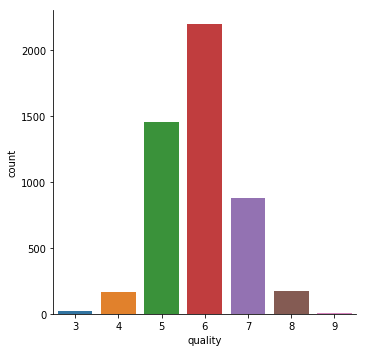

In [10]:
sns.catplot(x='quality',data=df,kind='count')

In [11]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

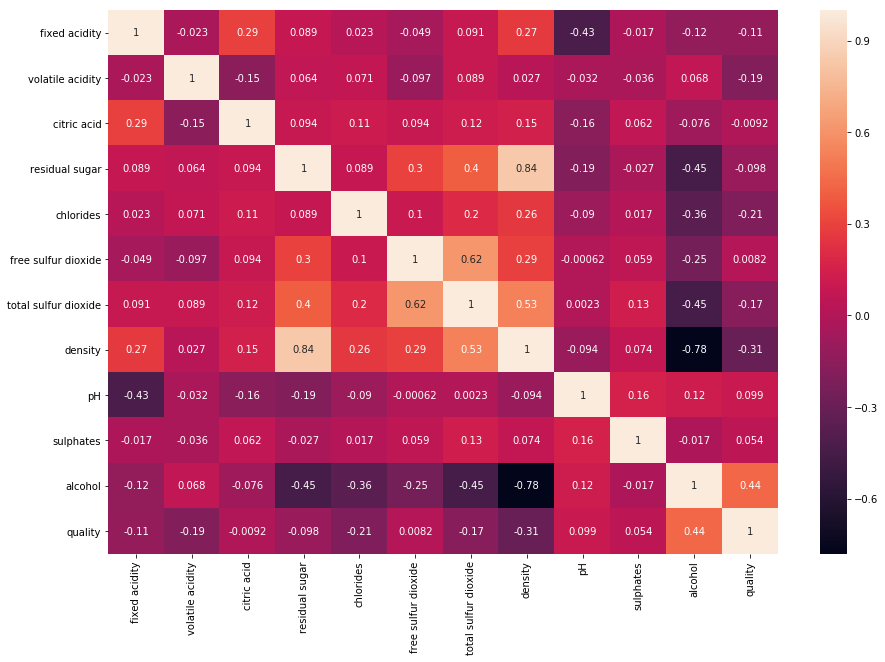

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
1-density & residual sugar has strong positive correlation
2-density & alcohol has strong negative correlation.
3-pH & fixed acidity has negative correlation.
4-density & fixed acidity has positive correlation.
5-citric acid & fixed acidity has positive correlation.
6-citric acid & volatile acidity has negative correlation.
7-free sulphur dioxide & total sulphur dioxide has positive correlation.

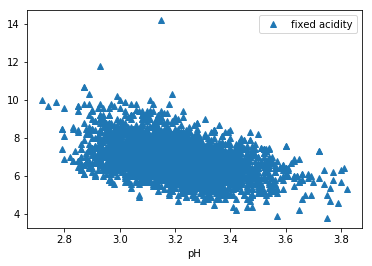

In [22]:
df.plot(x='pH', y='fixed acidity', style='^')

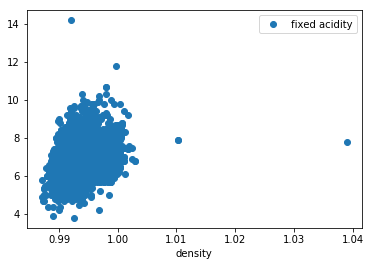

In [23]:
df.plot(x='density', y='fixed acidity', style='o')

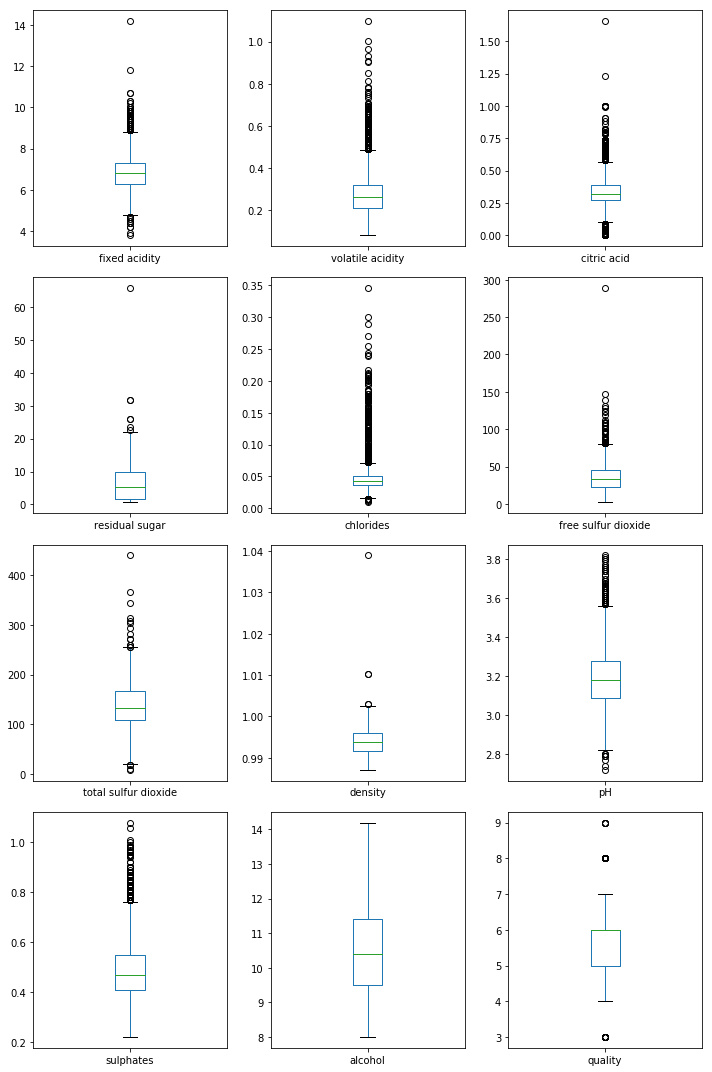

In [15]:
plt.figure(figsize=(10,15))
for i, col in enumerate(list(df.columns.values)):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()  

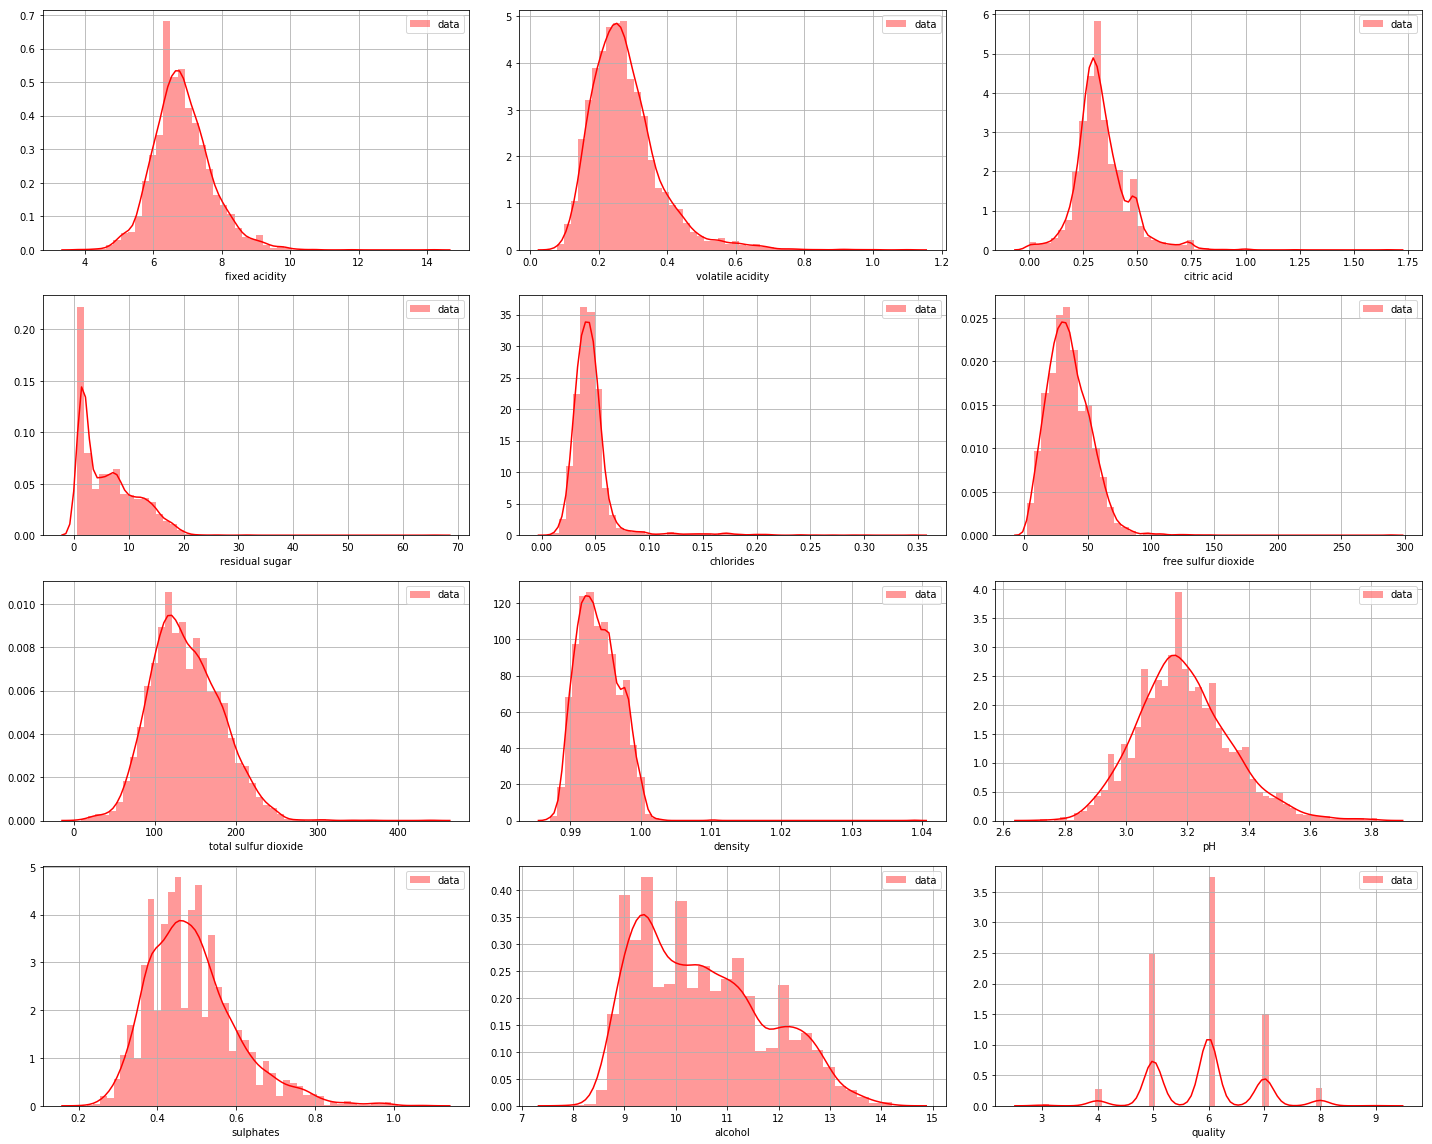

In [16]:
plt.figure(figsize=(20,16))
for i, col in enumerate(list(df.columns.values)):
    plt.subplot(4,3,i + 1)
    sns.distplot(df[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()
    

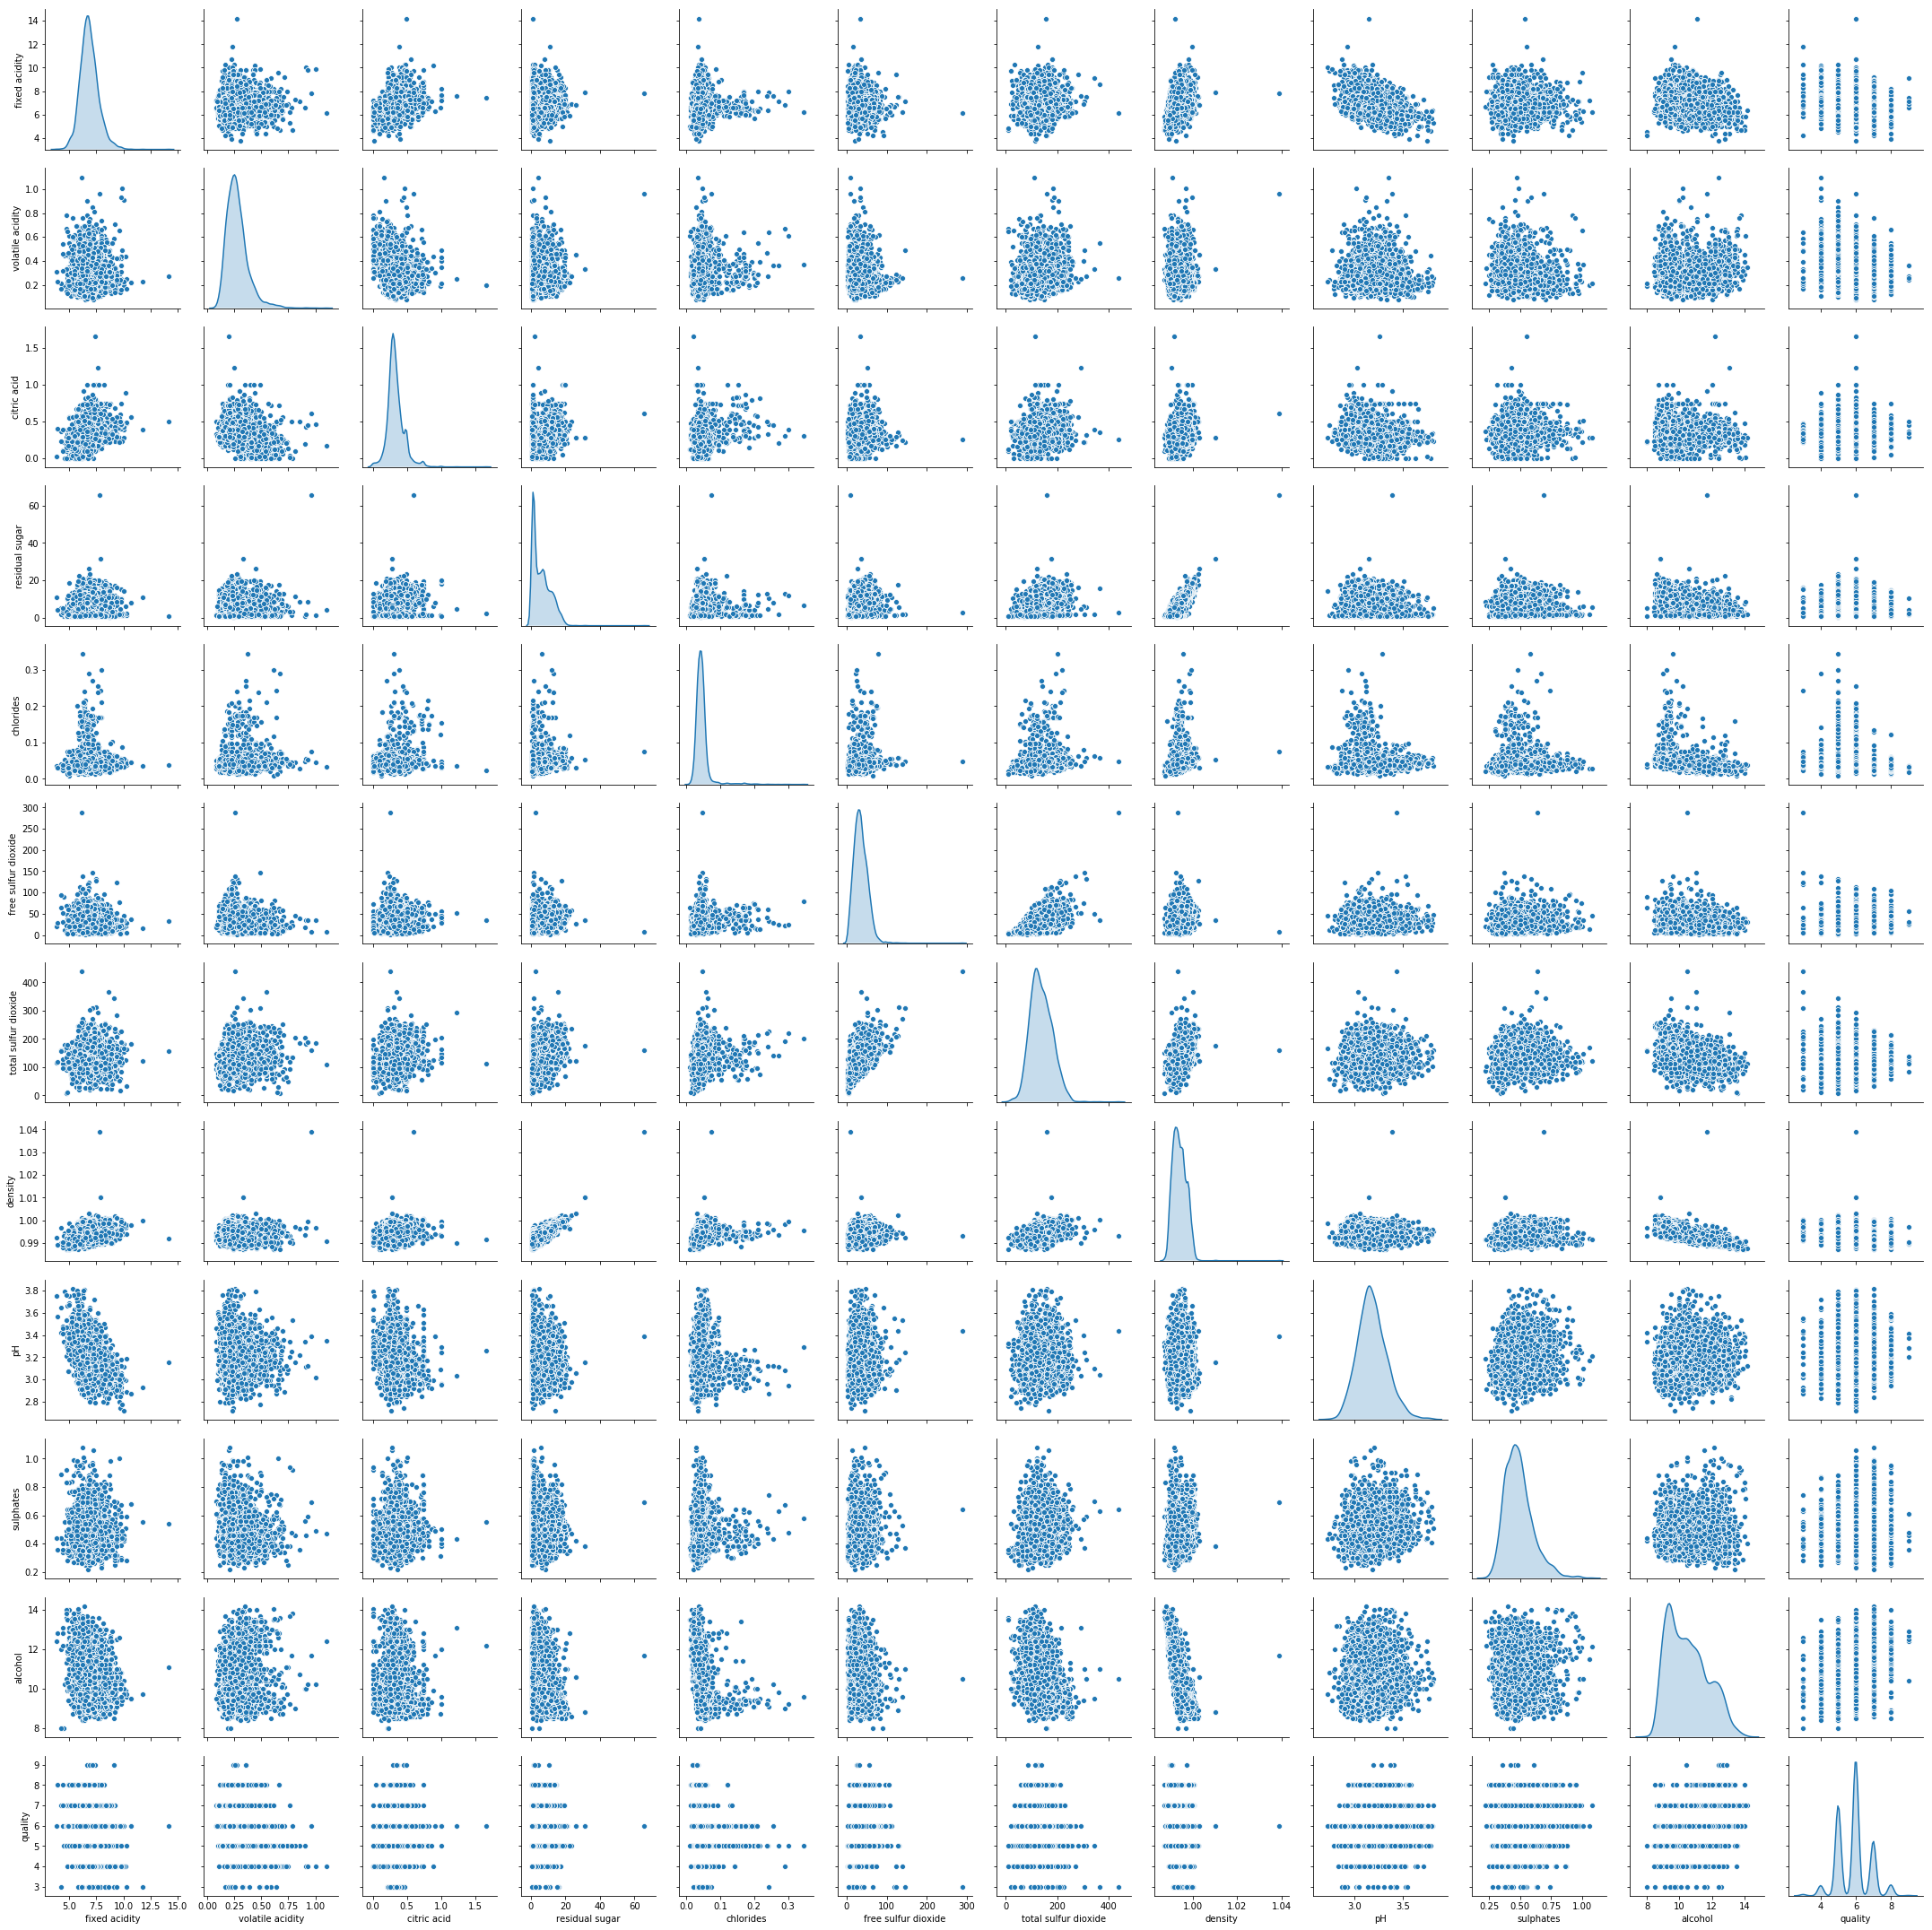

In [24]:
sns.pairplot(data=df,kind='scatter',diag_kind='kde')